In [1]:
from mofid.run_mofid import cif2mofid
from glob import glob
all_cifs = glob('/home/kevin/Dropbox (LSMO)/proj73_cleancore/data/structure_10143/*.cif')

In [ ]:
mofids = []

for cif in all_cifs:
    mofid = cif2mofid(cif)
    mofids.append(mofid)

*** Open Babel Error  in WriteSystre
  Found two neighboring 2-c sites.  Flagging the cgd output to get an error instead of the incorrect topology.
Note: Rerun ExportSystre() with simplify_two_conn=false if an unsimplified net is useful.
*** Open Babel Error  in WriteSystre
  Found two neighboring 2-c sites.  Flagging the cgd output to get an error instead of the incorrect topology.
Note: Rerun ExportSystre() with simplify_two_conn=false if an unsimplified net is useful.
*** Open Babel Error  in WriteSystre
  Found two neighboring 2-c sites.  Flagging the cgd output to get an error instead of the incorrect topology.
Note: Rerun ExportSystre() with simplify_two_conn=false if an unsimplified net is useful.
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): C(3)
*** Open Babel Error  in DetectInitialNodesAndLinkers
  Found a metal-bound oxygen with multiple carbon neighbors!  Results may have inconsistencies.
*** Open Babel Error  in DetectInitialNodesAndLinkers
  Fo

In [41]:
import pickle
with open('mofids.pkl', 'wb') as fh: 
    pickle.dump(mofids, fh)

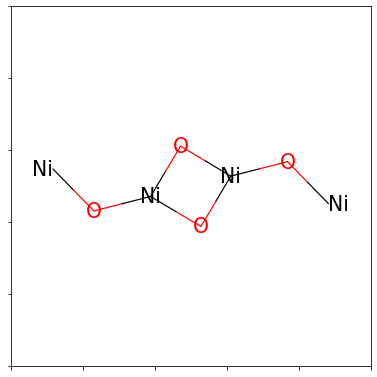

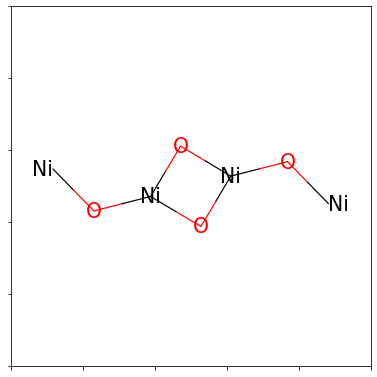

In [5]:
from rdkit import Chem
from rdkit.Chem import Draw

import matplotlib.pyplot as plt
%matplotlib inline

linker = '[Ni]O[Ni]1O[Ni](O1)O[Ni]' #mofid['smiles_linkers'][0]

linker_pic = Chem.MolFromSmiles(linker)

Draw.MolToMPL(linker_pic, size=(200, 200))

In [50]:
mofids[650:800]

[{'mofid': '[C]#N.[Er].[S]12[Re]3456[Re]7891[Re]1%1023[S]4[Re]681([S]57)[S]9%10 MOFid-v1.sql.cat1;ORAJAT_clean',
  'mofkey': 'ErRe.JEVCWSUVFOYBFI.MOFkey-v1.sql',
  'smiles_nodes': ['[Er]',
   '[S]12[Re]3456[Re]7891[Re]1%1023[S]4[Re]681([S]57)[S]9%10'],
  'smiles_linkers': ['[C]#N'],
  'smiles': '[C]#N.[Er].[S]12[Re]3456[Re]7891[Re]1%1023[S]4[Re]681([S]57)[S]9%10',
  'topology': 'sql',
  'cat': '1',
  'cifname': 'ORAJAT_clean'},
 {'mofid': '[Dy].[O-]C(=O)CN(C1=NC(=[N]=C([N]1)N(CC(=O)[O-])CC(=O)[O-])N(CC(=O)[O-])CC(=O)[O-])CC(=O)[O-] MOFid-v1.pts,UNKNOWN.cat0;CUKYAJ_clean',
  'mofkey': 'Dy.DJHGZIHTRHTINN.MOFkey-v1.pts',
  'smiles_nodes': ['[Dy]'],
  'smiles_linkers': ['[O-]C(=O)CN(C1=NC(=[N]=C([N]1)N(CC(=O)[O-])CC(=O)[O-])N(CC(=O)[O-])CC(=O)[O-])CC(=O)[O-]'],
  'smiles': '[Dy].[O-]C(=O)CN(C1=NC(=[N]=C([N]1)N(CC(=O)[O-])CC(=O)[O-])N(CC(=O)[O-])CC(=O)[O-])CC(=O)[O-]',
  'topology': 'pts,UNKNOWN',
  'cat': '0',
  'cifname': 'CUKYAJ_clean'},
 {'mofid': 'CC1=NC=C[N]1.[Zn] MOFid-v1.sod.cat0;SE

- Count aromatic rings http://www.dalkescientific.com/writings/diary/archive/2011/06/04/dealing_with_sssr.html
- https://docs.eyesopen.com/toolkits/python/oechemtk/aromaticity.html?highlight=aromatic
- https://mordred-descriptor.github.io/documentation/master/descriptors.html Aromatic atom/bond count, pi-path count

In [36]:
import pickle

with open('mofids.pkl', 'rb') as fh: 
    mofids = pickle.load(fh)

In [37]:
mofids[0]

{'mofid': '[Cd].[O-]C(=O)c1ccc(cc1)n1ncnc1.[OH] MOFid-v1.ERROR.cat0;YIXZEM_clean',
 'mofkey': 'Cd.FOMQQGKCPYKKHQ.MOFkey-v1.ERROR',
 'smiles_nodes': ['[Cd]', '[OH]'],
 'smiles_linkers': ['[O-]C(=O)c1ccc(cc1)n1ncnc1'],
 'smiles': '[Cd].[O-]C(=O)c1ccc(cc1)n1ncnc1.[OH]',
 'topology': 'ERROR',
 'cat': '0',
 'cifname': 'YIXZEM_clean'}

In [38]:
import numpy as np 

In [51]:
result_dicts = []
for i, mofid in enumerate(mofids):

    name = mofid['cifname']
    
    linker_descriptors = []
    
    try:
        for linker in mofid['smiles_linkers']:
            linker_descriptors.append(list(get_molecular_descriptors(linker).values()))

    
    # super inefficient to do this all the time. But i do not know if i'll change the descriptorlist ... 
  
        keys = list(get_molecular_descriptors(linker).keys())
        mean_keys = [s+'_mean' for s in keys]
        sum_keys = [s+'_sum' for s in keys]

        linker_descriptors = np.array(linker_descriptors)
        means = np.mean(linker_descriptors, axis=0)
        sums = np.mean(linker_descriptors, axis=0) 

        mean_dict = dict(zip(mean_keys, means))
        sum_dict = dict(zip(sum_keys, sums))

        result_dict = {}
        result_dict['name'] = name

        result_dict.update(sum_dict)
        result_dict.update(mean_dict)

        result_dicts.append(result_dict)
    except Exception as e: 
        print(i, name, e)
                
                
    
    

/home/kevin/anaconda3/envs/color_ml/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/kevin/anaconda3/envs/color_ml/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


9 BIXXIR_clean zip argument #2 must support iteration
25 IMAXUR_clean zip argument #2 must support iteration
82 YOZYUJ_clean zip argument #2 must support iteration
93 BIJDUV_clean zip argument #2 must support iteration
116 ROQMER02_clean zip argument #2 must support iteration
168 XANKOO_clean zip argument #2 must support iteration
217 DOQHUN_clean zip argument #2 must support iteration
283 OTODIM_clean zip argument #2 must support iteration
318 MALSAW_clean zip argument #2 must support iteration
325 MALROJ_clean zip argument #2 must support iteration
341 UMIZEX_clean zip argument #2 must support iteration
391 UTACUP_clean zip argument #2 must support iteration
415 CEKRUH_clean zip argument #2 must support iteration
438 FANDEG_clean zip argument #2 must support iteration
441 KEJXUU_clean zip argument #2 must support iteration
608 DAPXEZ_clean zip argument #2 must support iteration
620 AHUTIH_clean zip argument #2 must support iteration
662 RAVXOD_clean zip argument #2 must support itera

In [56]:
import pandas as pd 

df = pd.DataFrame(result_dicts)

In [57]:
df.to_csv('moldesc.csv', index=False)

In [58]:
list(df.columns)

['name',
 'primary_amide_sum',
 'secondary_amide_sum',
 'tertiary_amide_sum',
 'ester_sum',
 'carbonyl_sum',
 'logP_sum',
 'MR_sum',
 'dbratio_sum',
 'aromatic_rings_sum',
 'dbonds_sum',
 'abonds_sum',
 'primary_amide_mean',
 'secondary_amide_mean',
 'tertiary_amide_mean',
 'ester_mean',
 'carbonyl_mean',
 'logP_mean',
 'MR_mean',
 'dbratio_mean',
 'aromatic_rings_mean',
 'dbonds_mean',
 'abonds_mean']

In [4]:
import pybel

In [5]:
mymol = pybel.readstring("smi", "[O-]C(=O)c1cc(cc(c1)c1cccc2c1cccc2c1cc(cc(c1)C(=O)[O-])C(=O)[O-])C(=O)[O-]")

In [6]:
mymol.addh()

In [7]:
mymol.make3D()

In [8]:
mymol.localopt()

In [9]:
mymol.OBMol.Kekulize()

True

In [10]:
mymol.write("can")

'[O-]C(=O)c1=cc(=cc(=c1)c1=cc=cc2=c1c=cc=c2c1=cc(=cc(=c1)C(=O)[O-])C(=O)[O-])C(=O)[O-]\t\n'

In [11]:
mymol.OBMol.AddAtom

<bound method OBMol_AddAtom of <openbabel.OBMol; proxy of <Swig Object of type 'OpenBabel::OBMol *' at 0x7f666c2d25a0> >>

In [12]:
def openbabel_count_aromatic_rings(mol):
    count = 0
    mole = mol.OBMol
    for ring in mole.GetSSSR():
        # Note: the OB implementation is wrong. It assumes that if all
        # atoms in the ring are aromatic then the ring itself must be
        # aromatic. This is not necessarily true.
        if ring.IsAromatic():
            count += 1
    return count

In [13]:
def openbabel_count_bond_order(mol, bo=2):
    import openbabel as ob
    count = 0
    mole = mol.OBMol
    for bond in ob.OBMolBondIter(mole):
        # Note: the OB implementation is wrong. It assumes that if all
        # atoms in the ring are aromatic then the ring itself must be
        # aromatic. This is not necessarily true.
        if bond.GetBO() == bo:25
            count += 1
    return count

In [24]:
def openbabel_count_aromatic(mol):
    import openbabel as ob
    carboncounter = 1
    double_cc = 1
    mole = mol.OBMol
    for bond in ob.OBMolBondIter(mole):
        atom1 = bond.GetBeginAtom()
        atom2 = bond.GetEndAtom()
        symbol1 = atom1.GetAtomicNum()
        symbol2 = atom2.GetAtomicNum()
        
        if symbol1 == symbol2 == 6: 
            carboncounter += 1
            if bond.IsDouble():
                double_cc += 1
                
    return double_cc / carboncounter - 1

In [25]:
openbabel_count_aromatic(mymol)

-0.6

In [26]:
def get_group_counts(mol):
    import openbabel as ob
    mole = mol.OBMol
    group_dict = {
        'primary_amide': 0, 
        'secondary_amide': 0, 
        'tertiary_amide': 0, 
        'ester': 0, 
        'carbonyl': 0 
    }
    for bond in ob.OBMolBondIter(mole):
        if bond.IsPrimaryAmide():
            group_dict['primary_amide'] += 1
        elif bond.IsSecondaryAmide():
            group_dict['primary_amide'] += 1
        elif bond.IsTertiaryAmide():
            group_dict['tertiary_amide'] += 1
        elif bond.IsEster():
            group_dict['ester'] += 1
        elif bond.IsCarbonyl():
            group_dict['carbonyl'] += 1  
            
    return group_dict

In [27]:
openbabel_count_bond_order(mymol, bo=2)

15

In [28]:
get_group_counts(mymol)

{'primary_amide': 0,
 'secondary_amide': 0,
 'tertiary_amide': 0,
 'ester': 4,
 'carbonyl': 4}

In [32]:
mymol.calcdesc()

{'abonds': 0.0,
 'atoms': 46.0,
 'bonds': 49.0,
 'cansmi': nan,
 'cansmiNS': nan,
 'dbonds': 15.0,
 'formula': nan,
 'HBA1': 16.0,
 'HBA2': 8.0,
 'HBD': 0.0,
 'InChI': nan,
 'InChIKey': nan,
 'L5': nan,
 'logP': -0.37219999999999853,
 'MP': 315.61019999999996,
 'MR': 114.88800000000002,
 'MW': 452.36867999999987,
 'nF': 0.0,
 's': nan,
 'sbonds': 34.0,
 'smarts': nan,
 'tbonds': 0.0,
 'title': nan,
 'TPSA': 160.51999999999998}

## Try to get some features for the smiles 

In [33]:
def get_molecular_descriptors(smiles): 
    mymol = pybel.readstring("smi", smiles)
    
    descriptordict = {}
    
    group_counts = get_group_counts(mymol)
    desc = mymol.calcdesc()
    db_ratio = openbabel_count_aromatic(mymol)
    aromatic_rings = openbabel_count_aromatic_rings(mymol)
    
    descriptordict.update(group_counts)
    descriptordict['logP'] = desc['logP']
    descriptordict['MR'] = desc['MR']
    descriptordict['dbratio'] = db_ratio
    descriptordict['aromatic_rings'] = aromatic_rings
    descriptordict['dbonds'] = desc['dbonds']
    descriptordict['abonds'] = desc['abonds']
    
    return descriptordict

In [53]:
get_molecular_descriptors(mofids[662]['smiles_linkers'])

TypeError: in method 'OBConversion_ReadString', argument 3 of type 'std::string'

In [54]:
mofids[662]

{'mofid': '* MOFid-v1.NA.NA;RAVXOD_clean',
 'mofkey': '',
 'smiles_nodes': ['*'],
 'smiles_linkers': [],
 'smiles': '*',
 'topology': 'NA',
 'cat': None,
 'cifname': 'RAVXOD_clean'}

In [6]:
calc = Calculator(descriptors)

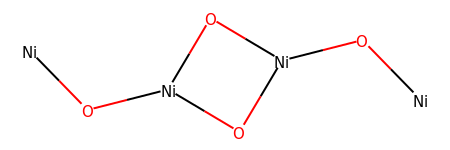

In [7]:
Chem.MolFromSmiles(linker)

In [10]:
df = calc.pandas([linker_pic])

100%|██████████| 1/1 [00:00<00:00,  2.41it/s]


In [12]:
df['A']

0    2.197225
Name: piPC1, dtype: float64